# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

# Opsi display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ignore warnings (opsional, tapi bisa membuat output lebih bersih)
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
FILE_NAME = 'diabetes_raw.csv'
FILE_PATH = os.path.join('..', FILE_NAME) 

# Muat dataset
try:
    df = pd.read_csv(FILE_PATH, delimiter=',')
    print(f"Dataset '{FILE_NAME}' berhasil dimuat dari '{FILE_PATH}'.")
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di '{FILE_PATH}'")
except Exception as e:
    print(f"Error tidak terduga saat memuat file: {e}")

# Tampilkan 5 baris pertama, info, dan missing values awal
if 'df' in locals():
    print("\n5 Baris Pertama Data:")
    print(df.head())
    print("\n--- Info Dataset ---")
    df.info()
    print("\n--- Missing Values Awal ---")
    print(df.isnull().sum())
    # Cek jumlah baris duplikat
    print(f"\nJumlah baris duplikat awal: {df.duplicated().sum()}")

Dataset 'diabetes_raw.csv' berhasil dimuat dari '..\diabetes_raw.csv'.

5 Baris Pertama Data:
   Diabetes_binary  HighBP  HighChol  CholCheck    BMI  Smoker  Stroke  \
0            0.000   1.000     0.000      1.000 26.000   0.000   0.000   
1            0.000   1.000     1.000      1.000 26.000   1.000   1.000   
2            0.000   0.000     0.000      1.000 26.000   0.000   0.000   
3            0.000   1.000     1.000      1.000 28.000   1.000   0.000   
4            0.000   0.000     0.000      1.000 29.000   1.000   0.000   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                 0.000         1.000   0.000    1.000              0.000   
1                 0.000         0.000   1.000    0.000              0.000   
2                 0.000         1.000   1.000    1.000              0.000   
3                 0.000         1.000   1.000    1.000              0.000   
4                 0.000         1.000   1.000    1.000              0.000   

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Memulai Exploratory Data Analysis (EDA)...
Kolom 'Outcome' tidak ditemukan. EDA mungkin tidak lengkap.

--- Statistik Deskriptif (Numerik) ---
       Diabetes_binary    HighBP  HighChol  CholCheck       BMI    Smoker  \
count        70692.000 70692.000 70692.000  70692.000 70692.000 70692.000   
mean             0.500     0.563     0.526      0.975    29.857     0.475   
std              0.500     0.496     0.499      0.155     7.114     0.499   
min              0.000     0.000     0.000      0.000    12.000     0.000   
25%              0.000     0.000     0.000      1.000    25.000     0.000   
50%              0.500     1.000     1.000      1.000    29.000     0.000   
75%              1.000     1.000     1.000      1.000    33.000     1.000   
max              1.000     1.000     1.000      1.000    98.000     1.000   

         Stroke  HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  \
count 70692.000             70692.000     70692.000 70692.000 70692.000   
mean      0.

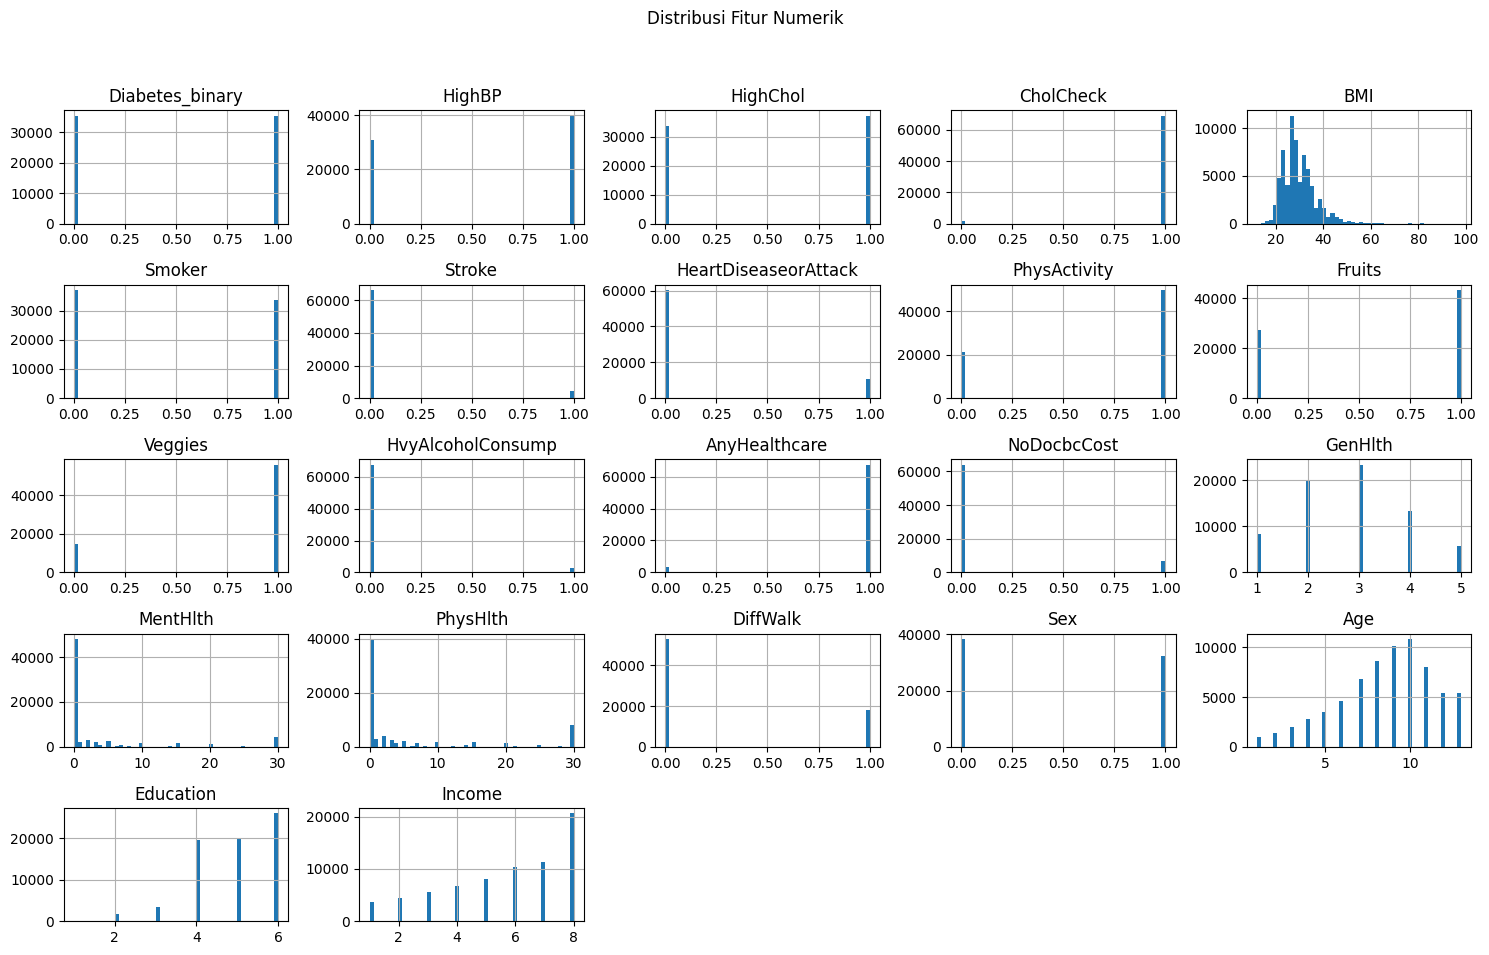


--- Heatmap Korelasi ---


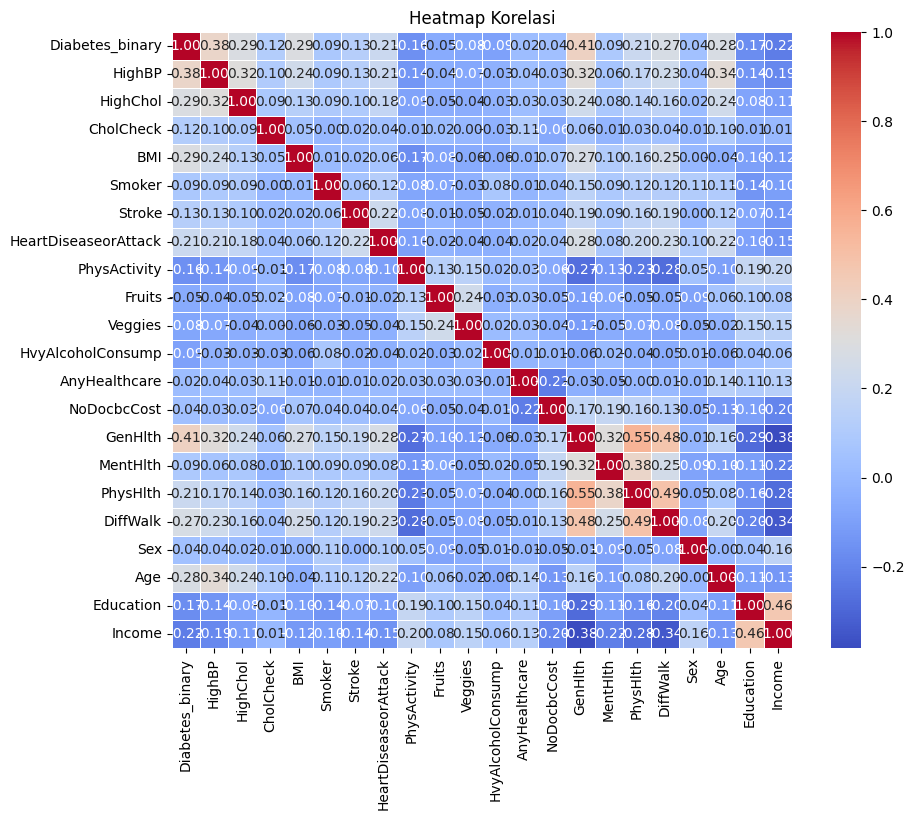

In [3]:
if 'df' in locals() and not df.empty:
    print("\n" + "="*30)
    print("Memulai Exploratory Data Analysis (EDA)...")
    print("="*30)
    
    # --- Deskripsi Variabel ---
    # Di dataset diabetes, semua kolom tampaknya numerik kecuali target 'Outcome'
    # pisahkan fitur dan target
    if 'Outcome' in df.columns:
        TARGET_COL = 'Outcome'
        numerical_features = df.drop(TARGET_COL, axis=1).columns.tolist()
        print(f"Target Variable: {TARGET_COL}")
        print(f"Numerical Features: {numerical_features}")
    else:
        print("Kolom 'Outcome' tidak ditemukan. EDA mungkin tidak lengkap.")
        TARGET_COL = None
        numerical_features = df.columns.tolist() # Anggap semua fitur numerik jika target tidak ada

    # --- Statistik Deskriptif ---
    print("\n--- Statistik Deskriptif (Numerik) ---")
    print(df[numerical_features].describe())
    
    # --- Analisis Univariate (Distribusi Fitur Numerik) ---
    print("\n--- Distribusi Fitur Numerik (Histogram) ---")
    df[numerical_features].hist(bins=50, figsize=(15, 10))
    plt.suptitle("Distribusi Fitur Numerik")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- Analisis Target Variable (Outcome) ---
    if TARGET_COL:
        print(f"\n--- Distribusi Target Variable ({TARGET_COL}) ---")
        outcome_counts = df[TARGET_COL].value_counts()
        print(outcome_counts)
        plt.figure(figsize=(6, 4))
        sns.countplot(x=df[TARGET_COL])
        plt.title(f'Distribusi {TARGET_COL} (0: Non-Diabetic, 1: Diabetic)')
        plt.show()

    # --- Analisis Multivariate (Korelasi) ---
    print("\n--- Heatmap Korelasi ---")
    plt.figure(figsize=(10, 8))
    # Korelasi dihitung pada semua kolom numerik (termasuk target jika ada)
    all_numeric_cols = df.select_dtypes(include=np.number).columns
    if not all_numeric_cols.empty:
         correlation_matrix = df[all_numeric_cols].corr()
         sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
         plt.title("Heatmap Korelasi")
         plt.show()
    else:
         print("Tidak ada kolom numerik untuk heatmap.")
         
else:
    print("DataFrame 'df' tidak terdefinisi atau kosong.")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
if 'df' in locals() and not df.empty:
    print("\n" + "="*30)
    print("Memulai Data Preprocessing...")
    print("="*30)
    
    df_prep = df.copy()
    TARGET_COL = 'Outcome'
    
    # 1. Drop Duplicates
    len_before_drop = len(df_prep)
    df_prep.drop_duplicates(inplace=True)
    print(f"Data setelah drop duplikat: {len(df_prep)} (dibuang {len_before_drop - len(df_prep)})")

    # 2. Handle Outliers (IQR)
    if TARGET_COL and TARGET_COL in df_prep.columns:
         cols_to_check_outliers = df_prep.drop(TARGET_COL, axis=1).select_dtypes(include=np.number).columns
    else:
         # Jika target tidak ada/bukan numerik, proses semua numerik
         cols_to_check_outliers = df_prep.select_dtypes(include=np.number).columns
         
    print("\n--- Penanganan Outliers (IQR) pada Fitur ---")
    count_before_outlier = len(df_prep)
    for col in cols_to_check_outliers:
        if col in df_prep.columns and pd.api.types.is_numeric_dtype(df_prep[col]):
            Q1 = df_prep[col].quantile(0.25)
            Q3 = df_prep[col].quantile(0.75)
            IQR_val = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR_val
            upper_bound = Q3 + 1.5 * IQR_val
            
            # Filter data
            df_prep = df_prep[(df_prep[col] >= lower_bound) & (df_prep[col] <= upper_bound)]
    
    count_after_outlier = len(df_prep)
    print(f"Data setelah handle outliers: {count_after_outlier} (dibuang {count_before_outlier - count_after_outlier} baris)")

    # 3. Handle Missing Values
    if df_prep.isnull().sum().sum() > 0:
         print("\nMenangani sisa missing values (jika ada) dengan drop baris...")
         rows_before_na = len(df_prep)
         df_prep.dropna(inplace=True)
         rows_after_na = len(df_prep)
         print(f"Sisa data setelah dropna: {rows_after_na} (dibuang {rows_before_na - rows_after_na})")
    else:
         print("\nTidak ada missing values yang perlu ditangani.")


    # 4. Menyimpan Hasil Preprocessing
    OUTPUT_DIR = 'diabetes_preprocessing' 
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

    OUTPUT_FILE_NAME = 'diabetes_preprocessing.csv'
    OUTPUT_FILE_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILE_NAME)
    
    try:
        df_prep.to_csv(OUTPUT_FILE_PATH, index=False)
    except Exception as e:
        print(f"Gagal menyimpan file CSV: {e}")
        
else:
    print("DataFrame 'df' tidak terdefinisi atau kosong.")


Memulai Data Preprocessing...
Data setelah drop duplikat: 69057 (dibuang 1635)

--- Penanganan Outliers (IQR) pada Fitur ---
Data setelah handle outliers: 20396 (dibuang 48661 baris)

Tidak ada missing values yang perlu ditangani.
